In [84]:
import requests
import matplotlib.pyplot as plt
import numpy
import pandas as pd  
from math import *
import time, datetime

In [137]:
now = str(time.time()).split('.')[0]
print(type(now))
print(now)
print(str(datetime.datetime.now()).split('.')[0])
import sys

<class 'str'>
1576990514
2019-12-21 23:55:14


In [141]:

url = "https://query1.finance.yahoo.com/v8/finance/chart/%5EGSPC?symbol=%5EGSPC&period1={}&period2={}&interval={}&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-US&region=US&crumb=ED2zlWJHcMa&corsDomain=finance.yahoo.com"

r = requests.get(url.format('1574186393', now, '30m'))

# r = requests.get("""https://query1.finance.yahoo.com/v8/finance/chart/%5EGSPC?symbol=%5EGSPC&period1=1574186393&period2=1576778393&interval=30m&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-US&region=US&crumb=ED2zlWJHcMa&corsDomain=finance.yahoo.com
# """)
yahoo = r.json()
time = yahoo["chart"]["result"][0]["timestamp"]
close =  yahoo["chart"]["result"][0]["indicators"]["quote"][0]["close"]
low =  yahoo["chart"]["result"][0]["indicators"]["quote"][0]["low"]
high =  yahoo["chart"]["result"][0]["indicators"]["quote"][0]["high"]
open =  yahoo["chart"]["result"][0]["indicators"]["quote"][0]["open"]
volume =  yahoo["chart"]["result"][0]["indicators"]["quote"][0]["volume"]

sys.version


'3.7.5 (default, Oct 31 2019, 15:18:51) [MSC v.1916 64 bit (AMD64)]'

In [139]:
def MFI(df, n):
    PP = (df['High'] + df['Low'] + df['Close']) / 3
    i = 0
    PosMF = [0]
    while i < df.index[-1]:
        if PP[i + 1] > PP[i]:
            PosMF.append(PP[i + 1] * df.get_value(i + 1, 'Volume'))
        else:
            PosMF.append(0)
        i = i + 1
    PosMF = pd.Series(PosMF)
    TotMF = PP * df['Volume']
    MFR = pd.Series(PosMF / TotMF)
    MFI = pd.Series(MFR.rolling(n).mean(), name = 'MFI_' + str(n))
    df = df.join(MFI)
    return df

def MFI2(df, n):
    """
    Money Flow Index and Ratio
    """
    PP = (df['High'] + df['Low'] + df['Close']) / 3
    i = 0
    PosMF = [0]
    while i < len(df) - 1:  # df.index[-1]:
        if PP[i + 1] > PP[i]:
            PosMF.append(PP[i + 1] * df.iat[i + 1, df.columns.get_loc('Volume')])
        else:
            PosMF.append(0)
        i=i + 1
    PosMF = pd.Series(PosMF)
    TotMF = PP * df['Volume']
    MFR = pd.Series(PosMF / TotMF)
    result = pd.Series(MFR.rolling(n).mean(), name='MFI_' + str(n))
    return result


# intialise data of lists. 
data = {'Open':open, 'Low': low , 'High': high, 'Close': close,'Volume':volume} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
df 

,Open,Low,High,Close,Volume
0,3119.360107,3119.290039,3120.560059,3120.560059,0
1,3120.570068,3118.729980,3122.389893,3121.030029,76558773
2,3121.030029,3120.699951,3122.659912,3121.040039,78143695
3,3121.030029,3121.030029,3125.159912,3124.820068,84908468
4,3124.820068,3121.570068,3124.860107,3122.040039,83130457
...,...,...,...,...,...
328,3221.850098,3221.439941,3225.649902,3224.899902,83408607
329,3224.899902,3222.669922,3224.909912,3222.889893,110834236
330,3222.879883,3220.510010,3223.840088,3220.510010,422271887
331,3221.160000,3221.160000,3221.230000,3221.220000,1468734712


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
328    0.714286
329    0.642857
330    0.571429
331    0.500000
332    0.500000
Name: MFI_14, Length: 333, dtype: float64

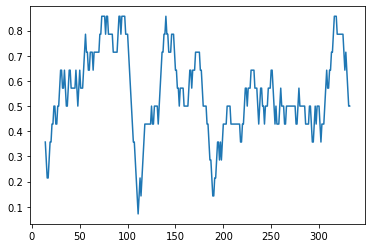

In [140]:
# mf = MFI(df, 14)
mfi = MFI2(df, 14)
plt.plot(mfi)
# mf
mfi